In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv 

In [2]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='baseline':
            cols.append('green')
        elif l=='exposure':
            cols.append('red')
        else:
            cols.append('blue')
    return cols

In [3]:
sensor_cols = ["s" + str(i) for i in range(1, 33)]

In [4]:
def calc_baseline(df):
    sensor_cols = ["s" + str(i) for i in range(1, 33)]
    
    exposure_row = 0
    for row in range(len(df['label'])):
        if df['label'][row]=='exposure' or df['label'][row]=='low':
            exposure_row = row
            break
        
    seconds_per_row = df['seconds'][1]-df['seconds'][0]
    # Take the 10 minutes before exposure as the baseline
    baseline = np.median(df[sensor_cols].iloc[exposure_row-int(10*60/seconds_per_row):exposure_row],axis=0).reshape(1, len(sensor_cols))
    
    return baseline

In [5]:
f = open('no_rules.csv', 'w+', newline ='')

sensors_saturated = []
saturated_total_per_sample = []
saturated_totals = np.zeros(len(sensor_cols))
root_dir=r"data/no/"
analyte_files = [os.path.join(folder, f) for folder, dirs, files in os.walk(root_dir) for f in files]
for file in analyte_files:
    df =  pd.read_csv(file)

    baseline = calc_baseline(df)
    
    saturation = [1 if x == 1000000 else 0 for x in baseline[0]]
    sensors_saturated.append([1 if x == 1000000 else 0 for x in baseline[0]])
    
    saturated_totals+=saturation
    saturated_total_per_sample.append(np.sum(saturation)) 

Text(0, 0.5, 'nb saturated sensors')

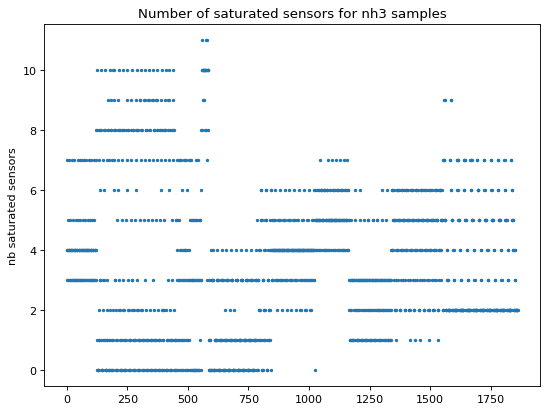

In [6]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(x = range(len(saturated_total_per_sample)), y=saturated_total_per_sample, s=4)
plt.title('Number of saturated sensors for nh3 samples')
plt.ylabel('nb saturated sensors')

In [7]:
means = np.mean(saturated_total_per_sample)
stds = np.std(saturated_total_per_sample)

In [8]:
f = open('no_stats.csv', 'w+', newline ='')


In [9]:
f.write('mean_nb_saturated,' + str(means) + '\n')

34

In [10]:
f.write('std_nb_saturated,' + str(stds) + '\n')

36

Text(0.5, 0, 'nb saturated sensors')

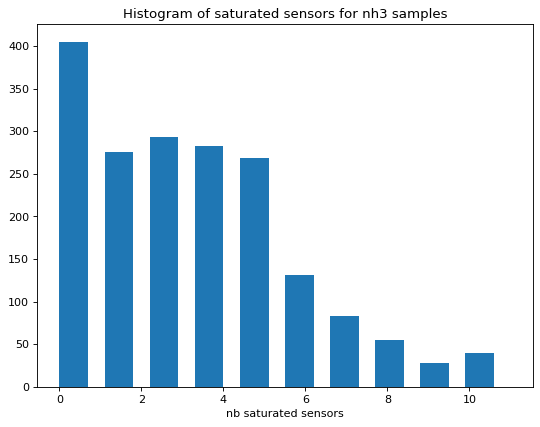

In [11]:
figure(figsize=(8, 6), dpi=80)
plt.hist(saturated_total_per_sample, align='mid', width=0.7)
plt.title('Histogram of saturated sensors for nh3 samples')
plt.xlabel('nb saturated sensors')

In [12]:
f.write('max_nb_saturated,' + str(max(saturated_total_per_sample)) +'\n')

20

Text(0, 0.5, '% saturated')

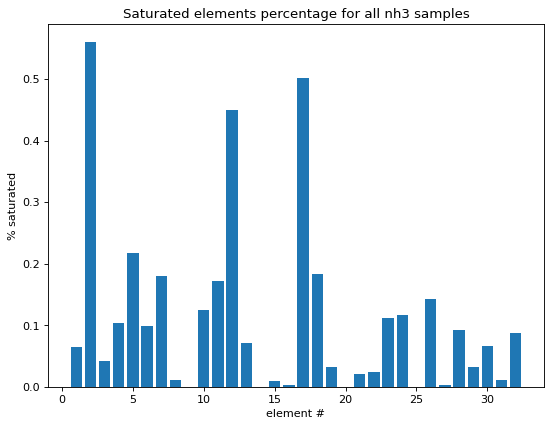

In [13]:
figure(figsize=(8, 6), dpi=80)
plt.bar(x = range(1, len(saturated_totals)+1), height=saturated_totals/len(analyte_files))
plt.title('Saturated elements percentage for all nh3 samples')
plt.xlabel('element #')
plt.ylabel('% saturated')

In [14]:
saturated_per_element = saturated_totals/len(analyte_files)

In [15]:
saturated_per_element == 0

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [16]:
never_lst = [i+1 for i, x in enumerate(saturated_per_element == 0) if x]

In [17]:
f.write('never_saturated,'+str(never_lst)+'\n')

32

In [18]:
mostly_lst = [2, 12, 17]

In [19]:
f.write('mostly_saturated,'+str(mostly_lst)+'\n')

29

In [20]:
f.close()